In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the data (assumes it's already cleaned and saved)
df = pd.read_csv('data/flights.csv')

# Define delay threshold (e.g. >15 minutes is considered delayed)
delay_threshold = 15
df['IS_DELAYED'] = df['ARRIVAL_DELAY'] > delay_threshold

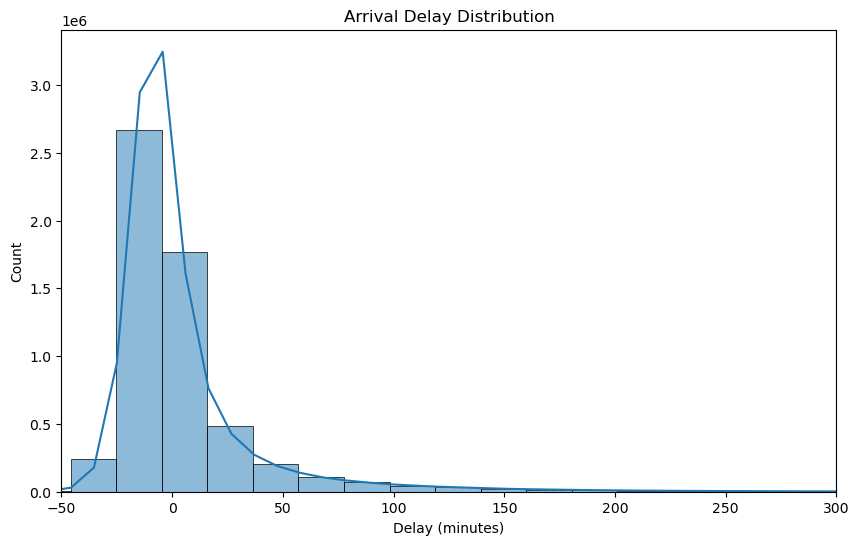

In [4]:
# 1. Distribution of arrival delays
plt.figure(figsize=(10, 6))
sns.histplot(df['ARRIVAL_DELAY'].dropna(), bins=100, kde=True)
plt.title('Arrival Delay Distribution')
plt.xlabel('Delay (minutes)')
plt.xlim(-50, 300)
plt.show()

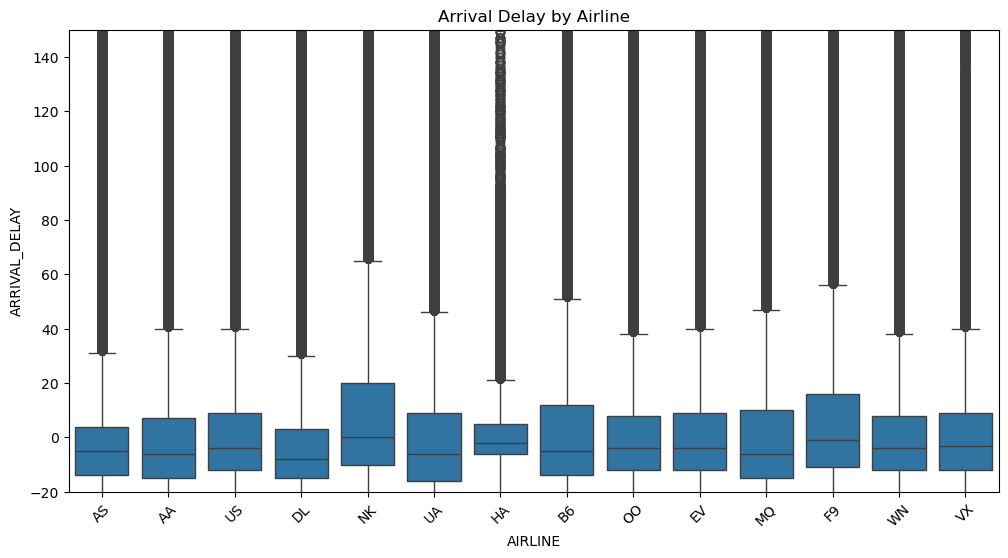

In [5]:
# 2. Boxplot by airline
plt.figure(figsize=(12, 6))
sns.boxplot(x='AIRLINE', y='ARRIVAL_DELAY', data=df)
plt.title('Arrival Delay by Airline')
plt.xticks(rotation=45)
plt.ylim(-20, 150)
plt.show()

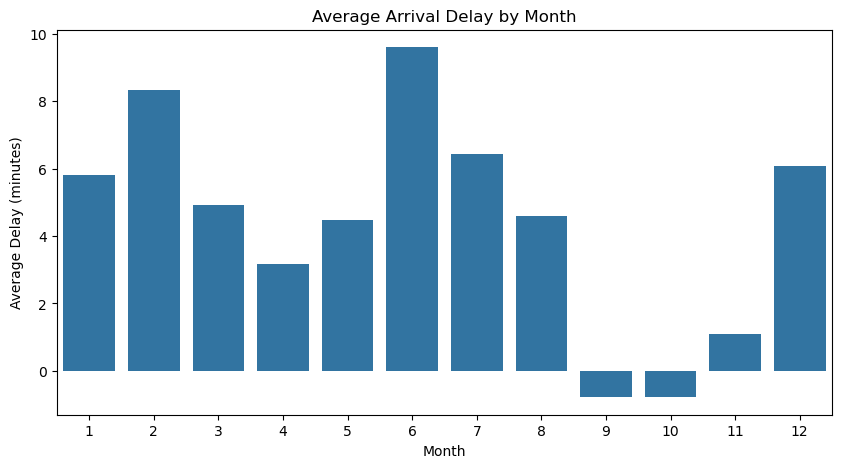

In [6]:
# 3. Average delay by month
monthly_delay = df.groupby('MONTH')['ARRIVAL_DELAY'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(x='MONTH', y='ARRIVAL_DELAY', data=monthly_delay)
plt.title('Average Arrival Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Delay (minutes)')
plt.show()

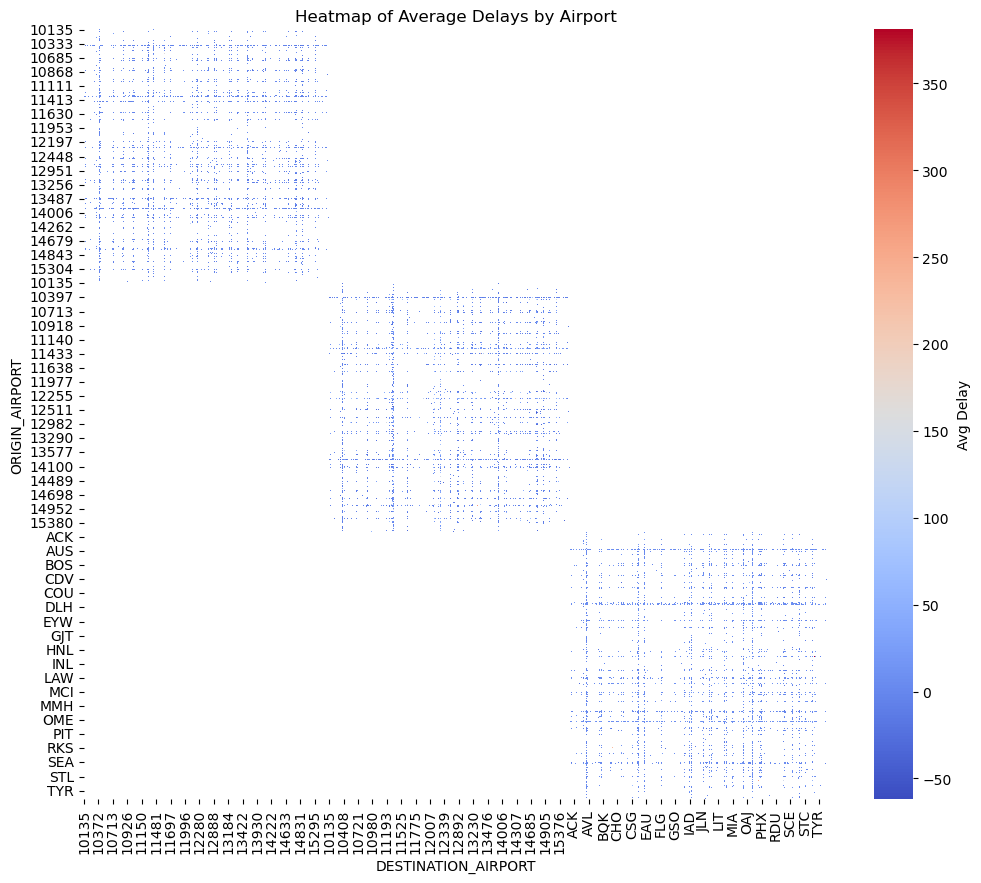

In [7]:
# 4. Heatmap: average delay by departure and arrival airport (if not too many)
pivot_airports = df.pivot_table(index='ORIGIN_AIRPORT', columns='DESTINATION_AIRPORT', 
                                values='ARRIVAL_DELAY', aggfunc='mean')
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_airports, cmap='coolwarm', cbar_kws={'label': 'Avg Delay'})
plt.title('Heatmap of Average Delays by Airport')
plt.show()